# Exploratory Data Analysis in Python
## Getting to Know a Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
books = pd.read_csv('../datasets/clean_books.csv')
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [9]:
books['genre'].value_counts()

Non Fiction    179
Fiction        131
Childrens       40
Name: genre, dtype: int64

In [11]:
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


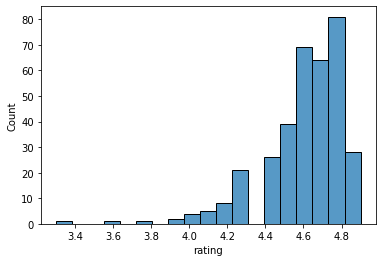

In [12]:
sns.histplot(data=books, x="rating")
plt.show()

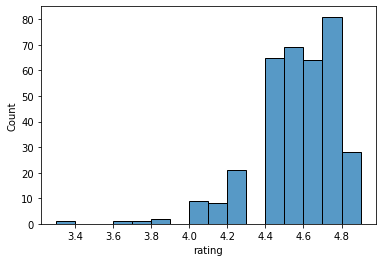

In [13]:
# Tamanho da largura 
sns.histplot(data=books, x="rating", binwidth=.1)
plt.show()

## Transforma categórico em booleano 

In [10]:
# Outra forma pode ser feito 
books.value_counts('genre')

genre
Non Fiction    179
Fiction        131
Childrens       40
dtype: int64

In [22]:
#  verdadeiro quando seja Fiction e Non Fiction 
true_fiction_and_not = books["genre"].isin(["Fiction", "Non Fiction"])
true_fiction_and_not

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [23]:
# Repare no til, ele faz a negação 
not_fiction_boolean = ~books["genre"].isin(["Fiction"])
not_fiction_boolean

0       True
1      False
2       True
3      False
4       True
       ...  
345     True
346    False
347     True
348    False
349     True
Name: genre, Length: 350, dtype: bool

In [24]:
# Um jeito bacana de pegar somente Fiction e Non Fiction
books[books["genre"].isin(["Fiction", "Non Fiction"])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


## Verificando os valores 

In [26]:
books.select_dtypes("number")

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019
...,...,...
345,4.4,2012
346,4.5,2012
347,4.2,2010
348,4.8,2013


## Boxplot

<AxesSubplot:xlabel='year', ylabel='genre'>

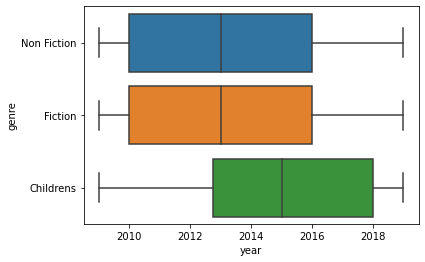

In [27]:
sns.boxplot(data=books, x="year", y="genre")

# Data summarization

In [28]:
books.groupby("genre").mean()

/tmp/ipykernel_38470/284016298.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  books.groupby("genre").mean()


,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


In [29]:
books.agg(["mean", "std"])

/tmp/ipykernel_38470/1469691538.py:1: FutureWarning: ['name', 'author', 'genre'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  books.agg(["mean", "std"])


,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


In [30]:
books.agg({"rating": ["mean", "std"], "year": ["median"]})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [31]:
books.groupby("genre").agg(
mean_rating=("rating", "mean"),
std_rating=("rating", "std"),
median_year=("year", "median")
)

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


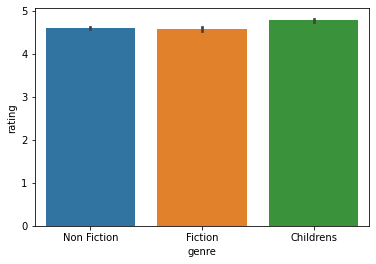

In [32]:
sns.barplot(data=books, x="genre", y="rating")
plt.show()